<a href="https://colab.research.google.com/github/Majeed1982/portfolio/blob/main/TF_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.17.1


In [2]:
# Other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Get the data
# Download the dataset from the specified URL using wget
# The command retrieves 'moore.csv' from the GitHub repository
# and saves it in the current working directory for use in analysis or modeling

!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2024-11-20 16:04:44--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2024-11-20 16:04:44 (30.4 MB/s) - ‘moore.csv’ saved [2302/2302]



In [4]:
# Load in the data
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1, 1) # make it a 2-D array of size N x D where D = 1
Y = data[:,1]

In [5]:
X

array([[1971],
       [1972],
       [1973],
       [1973],
       [1974],
       [1974],
       [1974],
       [1975],
       [1976],
       [1976],
       [1976],
       [1978],
       [1978],
       [1979],
       [1979],
       [1979],
       [1981],
       [1982],
       [1982],
       [1983],
       [1984],
       [1984],
       [1985],
       [1985],
       [1985],
       [1986],
       [1986],
       [1986],
       [1987],
       [1987],
       [1987],
       [1987],
       [1988],
       [1988],
       [1989],
       [1989],
       [1989],
       [1989],
       [1990],
       [1991],
       [1991],
       [1992],
       [1992],
       [1993],
       [1993],
       [1994],
       [1994],
       [1995],
       [1999],
       [1995],
       [1996],
       [1997],
       [1997],
       [1997],
       [1998],
       [1999],
       [1999],
       [2000],
       [2000],
       [1999],
       [1999],
       [1999],
       [2000],
       [2001],
       [2001],
       [2002],
       [20

In [6]:
Y

array([       2300,        3500,        2500,        2500,        4100,
              4500,        8000,        3510,        5000,        8500,
              6500,        9000,       29000,       17500,       29000,
             68000,       11500,       55000,      134000,       22000,
             63000,      190000,      275000,       25000,       16000,
            110000,      375000,       30000,      385000,      730000,
            273000,      553000,      180000,      250000,      600000,
           1000000,     1180235,      310000,     1200000,     1350000,
             35000,      600000,      900000,     2800000,     3100000,
            578977,     2500000,     2500000,      111000,     5500000,
           4300000,    10000000,     7500000,     8800000,     7500000,
           9500000,    13500000,    21000000,    21000000,    27400000,
          21300000,    22000000,    42000000,   191000000,    45000000,
          55000000,   112000000,   400000000,   169000000,   184

In [7]:
# Import the pandas library to read the CSV file
import pandas as pd

# Read the 'moore.csv' file without a header and convert it to a NumPy array
data = pd.read_csv('moore.csv', header=None).values

# Extract the first column (index 0) and reshape it into a 2D array of shape (N, 1)
# N is the number of rows in the data, and 1 indicates one column

# In the context of .reshape(-1, 1), the -1 allows the function to infer (or figure out) the appropriate number of rows based on the size of
# the original array and the constraint that there should be 1 column.
# For example, if the original data has 10 elements, .reshape(-1, 1) will infer that there need to be 10 rows to accommodate
# all the elements in a single column.
X = data[:, 0].reshape(-1, 1)

# Extract the second column (index 1) and assign it to Y
Y = data[:, 1]


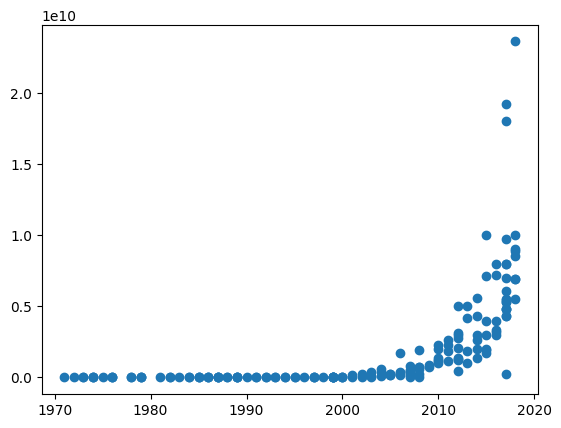

In [8]:
# Plot the data - it is exponential!
plt.scatter(X, Y)

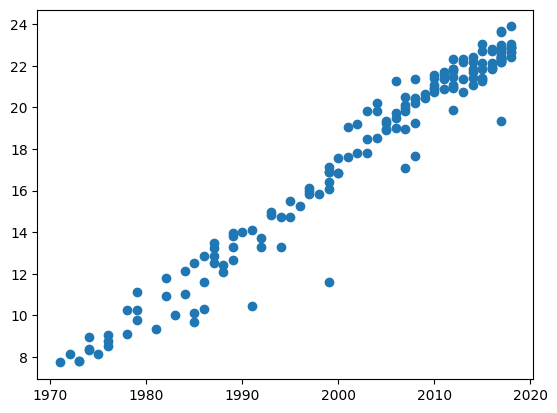

In [9]:
# Since we want a linear model, let's take the log
Y = np.log(Y)
plt.scatter(X, Y)
# that's better

In [10]:
# Let's also center the X data so the values are not too large
# Center the X data by subtracting the mean from each value
# This shifts the values so that the mean of X becomes 0, which can improve performance in certain algorithms and prevents large numbers from causing issues

# We could scale it too but then we'd have to reverse the transformation later

X = X - X.mean()

In [11]:
# Now create our Tensorflow model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(1,)),
  tf.keras.layers.Dense(1)
])

# Compile the model with the Stochastic Gradient Descent (SGD) optimizer
# using a learning rate of 0.001 and momentum of 0.9.
# The loss function is set to Mean Squared Error (MSE) for regression tasks.
# The commented-out line shows an alternative option using the Adam optimizer.

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')
# model.compile(optimizer='adam', loss='mse')


# Learning rate scheduler function that adjusts the learning rate based on the epoch number.
# If the epoch is 50 or greater, it returns a lower learning rate of 0.0001 to stabilize training.
# Otherwise, it returns the initial learning rate of 0.001 for faster learning in the early stages.
# learning rate scheduler

def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

# Create a LearningRateScheduler callback that adjusts the learning rate
# according to the defined 'schedule' function during training.
# The schedule function will be called at the beginning of each epoch
# to determine the appropriate learning rate based on the current epoch number.
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)


# Train the model
# Train the model using the input data X and target data Y for 200 epochs.
# The LearningRateScheduler callback (scheduler) is included to dynamically adjust
# the learning rate during training based on the current epoch number,
# optimizing the training process and potentially improving model performance.

r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 511.6941 - learning_rate: 0.0010
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 577.3294 - learning_rate: 0.0010
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 918.3308 - learning_rate: 0.0010
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1231.5238 - learning_rate: 0.0010
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 661.5302 - learning_rate: 0.0010
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 246.4050 - learning_rate: 0.0010
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 108.4892 - learning_rate: 0.0010
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 81.4298 - learning_rate: 0.0010
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 54.0716 - learning_rate: 0.0010
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42.1676 - learning_rate: 0.0010
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29.6726 - learning_rate: 0.0010
Epoch 12/2

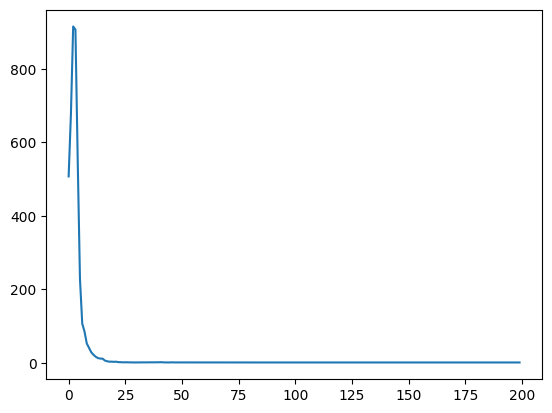

In [12]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

In [13]:
# Get the slope of the line
# The slope of the line is related to the doubling rate of transistor count
print(model.layers) # Note: there is only 1 layer, the "Input" layer doesn't count
print(model.layers[0].get_weights())

[<Dense name=dense, built=True>]
[array([[0.34805647]], dtype=float32), array([17.75591], dtype=float32)]


In [15]:
# The slope of the line is:
a = model.layers[0].get_weights()[0][0,0]
a

0.34805647

In [16]:
print("Time to double:", np.log(2) / a)

Time to double: 1.9914791118405373


In [17]:
# If you know the analytical solution
X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator
print(a, b)
print("Time to double:", np.log(2) / a)

0.341682487387313 17.764939393631764
Time to double: 2.0286295205239204


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


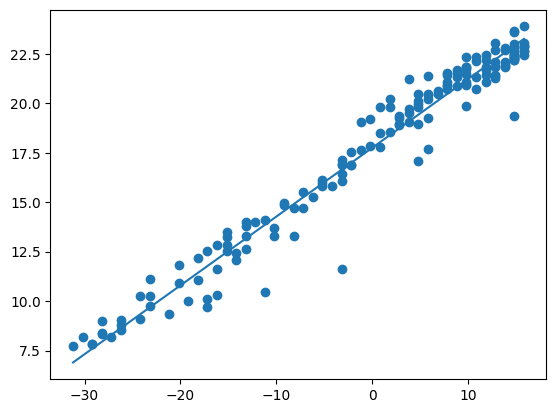

In [18]:
# Make sure the line fits our data
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)

In [19]:
# Manual calculation

# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X because we flattened it again earlier
X = X.reshape(-1, 1)

# (N x 1) x (1 x 1) + (1) --> (N x 1)
Yhat2 = (X.dot(w) + b).flatten()

# Don't use == for floating points
np.allclose(Yhat, Yhat2)

True